In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import time
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D

In [2]:
#File Importing (total 48 files)
def load_file(path,act):
    file = pd.read_hdf(path,key=act)
    #s_train.append(file)
    return file

# s1-s15:walk
s1 = load_file('wrist_ppg_data/s15_all_signals.hdf5','walk')
s2 = load_file('wrist_ppg_data/s16_all_signals.hdf5','walk')
s3 = load_file('wrist_ppg_data/s17_all_signals.hdf5','walk')
s4 = load_file('wrist_ppg_data/s21_all_signals.hdf5','walk')
s5 = load_file('wrist_ppg_data/s22_all_signals.hdf5','walk')
s6 = load_file('wrist_ppg_data/s23_all_signals.hdf5','walk')
s7 = load_file('wrist_ppg_data/s24_all_signals.hdf5','walk')
s8 = load_file('wrist_ppg_data/s25_all_signals.hdf5','walk')
s9 = load_file('wrist_ppg_data/s26_all_signals.hdf5','walk')
s10 = load_file('wrist_ppg_data/s27_all_signals.hdf5','walk')
s11 = load_file('wrist_ppg_data/s28_all_signals.hdf5','walk')
s12 = load_file('wrist_ppg_data/s30_all_signals.hdf5','walk')
s13 = load_file('wrist_ppg_data/s31_all_signals.hdf5','walk')
s14 = load_file('wrist_ppg_data/s32_all_signals.hdf5','walk')
s15 = load_file('wrist_ppg_data/s34_all_signals.hdf5','walk')
# s16-s19:run
s16 = load_file('wrist_ppg_data/s15_all_signals.hdf5','run')
s17 = load_file('wrist_ppg_data/s24_all_signals.hdf5','run')
s18 = load_file('wrist_ppg_data/s28_all_signals.hdf5','run')
s19 = load_file('wrist_ppg_data/s34_all_signals.hdf5','run')
# s20-s34:lrb
s20 = load_file('wrist_ppg_data/s15_all_signals.hdf5','lrb')
s21 = load_file('wrist_ppg_data/s16_all_signals.hdf5','lrb')
s22 = load_file('wrist_ppg_data/s17_all_signals.hdf5','lrb')
s23 = load_file('wrist_ppg_data/s21_all_signals.hdf5','lrb')
s24 = load_file('wrist_ppg_data/s22_all_signals.hdf5','lrb')
s25 = load_file('wrist_ppg_data/s23_all_signals.hdf5','lrb')
s26 = load_file('wrist_ppg_data/s24_all_signals.hdf5','lrb')
s27 = load_file('wrist_ppg_data/s25_all_signals.hdf5','lrb')
s28 = load_file('wrist_ppg_data/s26_all_signals.hdf5','lrb')
s29 = load_file('wrist_ppg_data/s27_all_signals.hdf5','lrb')
s30 = load_file('wrist_ppg_data/s28_all_signals.hdf5','lrb')
s31 = load_file('wrist_ppg_data/s30_all_signals.hdf5','lrb')
s32 = load_file('wrist_ppg_data/s31_all_signals.hdf5','lrb')
s33 = load_file('wrist_ppg_data/s32_all_signals.hdf5','lrb')
s34 = load_file('wrist_ppg_data/s34_all_signals.hdf5','lrb')
# s35-s48:hrb
s35 = load_file('wrist_ppg_data/s15_all_signals.hdf5','hrb')
s36 = load_file('wrist_ppg_data/s16_all_signals.hdf5','hrb')
s37 = load_file('wrist_ppg_data/s17_all_signals.hdf5','hrb')
s38 = load_file('wrist_ppg_data/s21_all_signals.hdf5','hrb')
s39 = load_file('wrist_ppg_data/s23_all_signals.hdf5','hrb')
s40 = load_file('wrist_ppg_data/s24_all_signals.hdf5','hrb')
s41 = load_file('wrist_ppg_data/s25_all_signals.hdf5','hrb')
s42 = load_file('wrist_ppg_data/s26_all_signals.hdf5','hrb')
s43 = load_file('wrist_ppg_data/s27_all_signals.hdf5','hrb')
s44 = load_file('wrist_ppg_data/s28_all_signals.hdf5','hrb')
s45 = load_file('wrist_ppg_data/s30_all_signals.hdf5','hrb')
s46 = load_file('wrist_ppg_data/s31_all_signals.hdf5','hrb')
s47 = load_file('wrist_ppg_data/s32_all_signals.hdf5','hrb')
s48 = load_file('wrist_ppg_data/s34_all_signals.hdf5','hrb')

In [3]:
# concat data and add label column
def concat_file(startn,endn):
    frame = []
    for i in range(startn,endn):
        ss = 's' + str(i) #represent s1,s2,...,s48
        s_con = eval(ss) #convert to pandas dataframe
        frame.append(s_con) #saved in a list
    return frame

# add label
d_walk = pd.concat(concat_file(1,16))
d_walk['label'] = 0
d_run = pd.concat(concat_file(16,20))
d_run['label'] = 1
d_lrb = pd.concat(concat_file(20,35))
d_lrb['label'] = 2
d_hrb = pd.concat(concat_file(35,49))
d_hrb['label'] = 3
data = pd.concat([d_walk,d_run,d_lrb,d_hrb])
print(type(data))
print(data.shape)
#print(data.head)

<class 'pandas.core.frame.DataFrame'>
(5685320, 19)


In [4]:
#delete useless information
data = data.drop(['events','chest_ecg','chest_accelerometer_x','chest_accelerometer_y','chest_accelerometer_z','wrist_right_hr','ankle_left_ppg','ankle_left_accelerometer_x','ankle_left_accelerometer_y','ankle_left_accelerometer_z','ankle_right_ppg','ankle_right_accelerometer_x','ankle_right_accelerometer_y','ankle_right_accelerometer_z'],axis = 1).copy()
data.head(5776993)
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5685320 entries, 0.0 to 601.215
Data columns (total 5 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   wrist_left_ppg              float64
 1   wrist_left_accelerometer_x  float64
 2   wrist_left_accelerometer_y  float64
 3   wrist_left_accelerometer_z  float64
 4   label                       int64  
dtypes: float64(4), int64(1)
memory usage: 260.3 MB


In [5]:
min_activity = data['label'].value_counts().min()
data['label'].value_counts()

2    1787775
0    1775700
3    1656919
1     464926
Name: label, dtype: int64

In [6]:
# Scale Standardization
xdata = data[['wrist_left_ppg','wrist_left_accelerometer_x','wrist_left_accelerometer_y','wrist_left_accelerometer_z']]
min_max_scaler = MinMaxScaler(feature_range=(-1,1)) #scale to the range (-1,1)
X = min_max_scaler.fit_transform(xdata)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(5685320, 4)


In [7]:
#combine scaled data
scaled_data = pd.DataFrame(data = X, columns = ['ppg','accx','accy','accz'])
scaled_data['label'] = data['label'].values
print(scaled_data.shape)
print(type(scaled_data))
print(scaled_data.head(5776992))

(5685320, 5)
<class 'pandas.core.frame.DataFrame'>
              ppg      accx      accy      accz  label
0        0.091756 -0.159367  0.393531  0.061759      0
1        0.091241 -0.158706  0.392370  0.059931      0
2        0.090738 -0.158131  0.391169  0.058367      0
3        0.090222 -0.157813  0.390377  0.057170      0
4        0.089678 -0.157887  0.390376  0.056384      0
...           ...       ...       ...       ...    ...
5685315 -0.170856  0.147863 -0.406727 -0.058306      3
5685316 -0.181045  0.142977 -0.404441 -0.064955      3
5685317 -0.192560  0.132919 -0.403442 -0.072393      3
5685318 -0.204983  0.118292 -0.402980 -0.080206      3
5685319 -0.218243  0.101060 -0.403041 -0.087830      3

[5685320 rows x 5 columns]


In [8]:
# Sliding Window Segment
fs = 200
frame_size = fs * 8 # one frame consists of 2 seconds
hop_size = fs * 1  #87.5% overlap

def get_frames(x_train, frame_size, hop_size):
    N_FEATURES = 4
    frames = []
    labels = []
    
    for i in range(0, len(x_train) - frame_size, hop_size):
        ppg = x_train['ppg'].values[i:i+frame_size]
        x = x_train['accx'].values[i:i+frame_size]
        y = x_train['accy'].values[i:i+frame_size]
        z = x_train['accz'].values[i:i+frame_size]
        
        # retrieve the most often used label in this segment
        label = stats.mode(x_train['label'][i:i+frame_size])[0][0]
        frames.append([ppg,x, y, z])
        labels.append(label)
    
    # bring the segment into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    return frames, labels

X,y = get_frames(scaled_data, frame_size, hop_size)
print(X.shape,y.shape) #(5776992*features)/(frame_size*2)
print(y)

(28419, 1600, 4) (28419,)
[0 0 0 ... 3 3 3]


In [9]:
# one-hot convertion
y = tf.keras.utils.to_categorical(y)
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(28419, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [10]:
# split training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_test)

(19893, 1600, 4) (8526, 1600, 4) (19893, 4) (8526, 4)
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [11]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [12]:
#Generate CNN Model
model = Sequential()
time_steps = X_train.shape[1]
features = X_train.shape[2]
model.add(Conv1D(8, 3, activation='relu', input_shape=(time_steps,features)))
model.add(MaxPool1D(pool_size=3,strides = 3))

model.add(Conv1D(16, 3, activation='relu'))
model.add(MaxPool1D(pool_size=2,strides = 2))

model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPool1D(pool_size=2,strides = 2))
model.add(Dropout(0.1))

model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPool1D(pool_size=2,strides = 2))
model.add(Dropout(0.25))

model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPool1D(pool_size=2,strides = 2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1598, 8)           104       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 532, 8)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 530, 16)           400       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 265, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 263, 32)           1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 131, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 131, 32)           0

In [13]:
#Model compiler settings
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#Model Training
t1 = time.time()
history = model.fit(X_train, y_train, epochs=120,batch_size=64,validation_split = 0.2)
t2 = time.time()
dt = t2 - t1
print(dt)

Epoch 1/120
249/249 [==============================] - 17s 66ms/step - loss: 0.8707 - accuracy: 0.5869 - val_loss: 0.6683 - val_accuracy: 0.6823
Epoch 2/120
249/249 [==============================] - 16s 63ms/step - loss: 0.6332 - accuracy: 0.7104 - val_loss: 0.5923 - val_accuracy: 0.7371
Epoch 3/120
249/249 [==============================] - 16s 63ms/step - loss: 0.5017 - accuracy: 0.7764 - val_loss: 0.4031 - val_accuracy: 0.8311
Epoch 4/120
249/249 [==============================] - 16s 64ms/step - loss: 0.4374 - accuracy: 0.8036 - val_loss: 0.3609 - val_accuracy: 0.8547
Epoch 5/120
249/249 [==============================] - 16s 63ms/step - loss: 0.3922 - accuracy: 0.8291 - val_loss: 0.3184 - val_accuracy: 0.8681
Epoch 6/120
249/249 [==============================] - 16s 63ms/step - loss: 0.3644 - accuracy: 0.8408 - val_loss: 0.3524 - val_accuracy: 0.8397
Epoch 7/120
249/249 [==============================] - 16s 64ms/step - loss: 0.3435 - accuracy: 0.8544 - val_loss: 0.2851 - val_ac

249/249 [==============================] - 17s 68ms/step - loss: 0.0607 - accuracy: 0.9748 - val_loss: 0.0906 - val_accuracy: 0.9708
Epoch 114/120
249/249 [==============================] - 16s 65ms/step - loss: 0.0773 - accuracy: 0.9713 - val_loss: 0.1062 - val_accuracy: 0.9621
Epoch 115/120
249/249 [==============================] - 17s 67ms/step - loss: 0.0717 - accuracy: 0.9720 - val_loss: 0.0924 - val_accuracy: 0.9701
Epoch 116/120
249/249 [==============================] - 17s 67ms/step - loss: 0.0729 - accuracy: 0.9722 - val_loss: 0.0981 - val_accuracy: 0.9663
Epoch 117/120
249/249 [==============================] - 17s 67ms/step - loss: 0.0683 - accuracy: 0.9735 - val_loss: 0.1056 - val_accuracy: 0.9646
Epoch 118/120
249/249 [==============================] - 17s 70ms/step - loss: 0.0717 - accuracy: 0.9727 - val_loss: 0.1068 - val_accuracy: 0.9628
Epoch 119/120
249/249 [==============================] - 17s 70ms/step - loss: 0.0610 - accuracy: 0.9769 - val_loss: 0.1187 - val_ac

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size = 64)
#history.history

134/134 [==============================] - 2s 15ms/step - loss: 0.0888 - accuracy: 0.9745


In [24]:
#df = pd.DataFrame(history.history)
#df.to_csv("saved_data/lr_0.0001_final.csv",index = False)

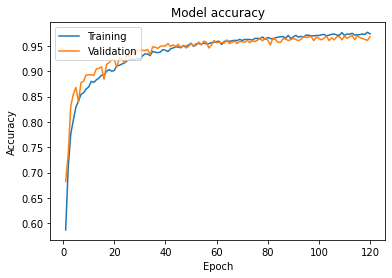

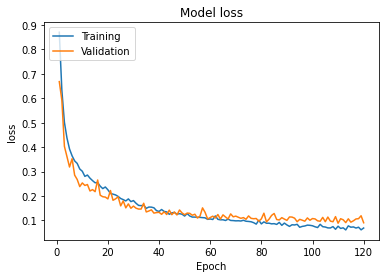

In [16]:
def plot_learning_curve(history, epochs):
    # Plot training and valiation accuracy values    
    epoch_range = range(1, epochs + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Number of epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()
    
    # Plot training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title("Model loss")
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()
plot_learning_curve(history, 120)

In [20]:
# change format to plot
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
y_test = np.argmax(y_test, axis = 1) ##change one-hot format to singe number
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred.shape,y_test.shape

((8526,), (8526,))

Text(0, 0.5, 'True Label')

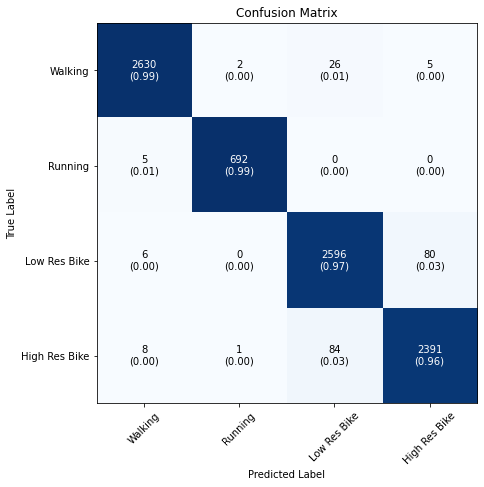

In [26]:
#plot confusion matrix
Activities = ['Walking', 'Running', 'Low Res Bike', 'High Res Bike']
#accuracy_score(y_test, y_pred)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=Activities, show_normed=True, figsize=(7,7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.show()

In [25]:
#Save Model
model.save('Saved_models/CNN_model')

INFO:tensorflow:Assets written to: Saved_models/CNN_model\assets
